## imports


In [24]:
import pickle
import tensorflow as tf
from numpy.random import seed
seed(888)
tf.random.set_seed(404)

In [137]:
label_names = ['plane', 'car','bird', 'cat', 'deer', 'dog','frog','horse', 'ship', 'truck']
log_dir = "tensorflow_cifar_logs/"
image_width = 32
image_height = 32
channel = 3
nr_pixel = image_height * image_width
nr_input = image_width * image_height *channel
validation_size = 10000
small_train_size = 1000

In [138]:
import numpy as np
import IPython
import keras
import os
from time import strftime
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix

In [95]:
# LOADING PICKLE
with open('cifar10_dataset.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

x_train_all = dataset['x_train_all']
y_train_all = dataset['y_train_all']
x_test = dataset['x_test']
y_test = dataset['y_test']


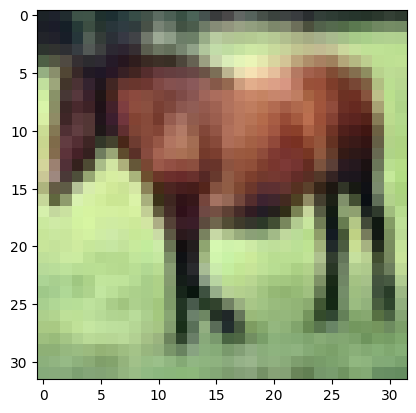

In [28]:
plt.imshow(x_train_all[7])

In [96]:
img = array_to_img(x_train_all[7])


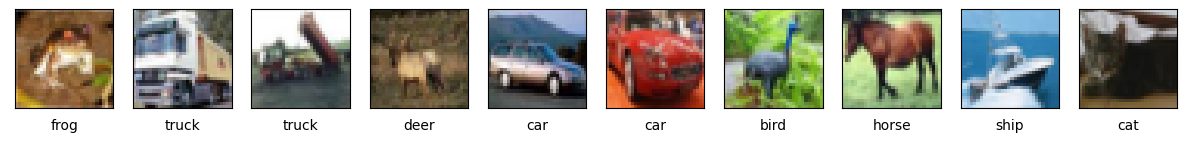

In [30]:
plt.figure(figsize=(15,5))
for i in range (10):
    plt.subplot(1,10,i+1)
    plt.xlabel(label_names[y_train_all[i][0]])
    plt.yticks([])
    plt.xticks([])
    plt.imshow(x_train_all[i])
  
    
    

In [31]:
x_train_all[0][0].shape


(32, 3)

## tensorboard setup

## preprocess data

In [97]:
x_train_all, x_test = x_train_all/255.0, x_test/255.0



In [100]:
#reshaping to flat array
x_train_all = x_train_all.reshape(len(x_train_all),nr_input)
x_test = x_test.reshape(len(x_test),nr_input)

In [101]:
# creating validation dataset
x_val = x_train_all[:validation_size]
y_val = y_train_all[:validation_size]
x_train = x_train_all[validation_size:]
y_train = y_train_all[validation_size:]

## create a smaller datatset

In [102]:
x_train_ss = x_train_all[:small_train_size]
y_train_ss = y_train_all[:small_train_size]

In [36]:
## DEFINING NEURAL NETWORK WITH KERAS

model_1 = Sequential([Dense(units =128, input_dim= nr_input, activation= 'relu'),
                      Dense(units = 64,activation='relu'),Dense(units = 16,activation='relu'), Dense(units=10, activation='softmax')])


model_1.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [42]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed= 42, input_shape = (nr_input,)))
model_2.add(Dense(units=128, input_dim = nr_input, activation = 'relu'))
model_2.add(Dropout(0.25, seed= 42))
model_2.add(Dense(units=64, activation = 'relu'))
model_2.add(Dense(units = 16, activation = 'relu'))
model_2.add(Dense(units = 10, activation = 'softmax'))

model_2.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [50]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed= 42, input_shape = (nr_input,)))
model_3.add(Dense(units=128, input_dim = nr_input, activation = 'relu'))
model_3.add(Dense(units=64, activation = 'relu'))
model_3.add(Dense(units = 16, activation = 'relu'))
model_3.add(Dense(units = 10, activation = 'softmax'))

model_3.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [43]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5 (Dropout)         (None, 3072)              0         
                                                                 
 dense_32 (Dense)            (None, 128)               393344    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 16)                1040      
                                                                 
 dense_35 (Dense)            (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-tr

In [44]:
def get_tensorboard(model_name):
    folder_name = f"{model_name} at {strftime('%H %M %S')}"
    directory = os.path.join(log_dir, folder_name)
    try:
        os.makedirs(directory)

    except OSError as err:
        print(err.strerror)

    else:
        print('successfully created')

    return TensorBoard(directory)

In [45]:
nr_per_batch = 1000

In [47]:

%%time
nr_epochs= 100el_
model_1.fit(x_train, y_train ,validation_data=(x_val , y_val),callbacks=get_tensorboard('mod1'),verbose = 0, epochs= 20,batch_size=nr_per_batch)

successfully created
CPU times: total: 4min 47s
Wall time: 6min


In [48]:

%%time
nr_epochs= 100
model_2.fit(x_train, y_train ,validation_data=(x_val , y_val),callbacks=get_tensorboard('model_1'),verbose = 0, epochs= 20,batch_size=nr_per_batch)

successfully created
CPU times: total: 6min 35s
Wall time: 6min 40s


In [51]:

%%time
nr_epochs= 100
model_3.fit(x_train, y_train ,validation_data=(x_val , y_val),callbacks=get_tensorboard('model_1'),verbose = 0, epochs= 20,batch_size=nr_per_batch)

successfully created
CPU times: total: 6min 23s
Wall time: 5min 51s


In [59]:
test = np.expand_dims(x_val[0], axis = 0)
predicted_probs =model_2.predict(test)
predicted_probs

1/1 [==============================] - 12s 12s/step


array([[0.00652517, 0.01777207, 0.07834741, 0.11483526, 0.11077853,
        0.05731572, 0.5735092 , 0.03681033, 0.0008998 , 0.00320654]],
      dtype=float32)

In [62]:
predicted_classes = predicted_probs.argmax()
predicted_classes

6

In [77]:
predicted_class_list =[]
actual_class = []
for i in range(10):
    test_img = np.expand_dims(x_val[i], axis = 0)
    predicted_prob = model_2.predict(test_img)
    predicted_class = np.argmax(predicted_prob)
    print(predicted_class)
    predicted_class_list.append(label_names[predicted_class])
    actual_value = y_val[i]
    actual_class.append(label_names[actual_value[0]])

1/1 [==============================] - 13s 13s/step
6
1/1 [==============================] - 9s 9s/step
1
1/1 [==============================] - 13s 13s/step
9
1/1 [==============================] - 10s 10s/step
6
1/1 [==============================] - 9s 9s/step
8
1/1 [==============================] - 14s 14s/step
9
1/1 [==============================] - 9s 9s/step
4
1/1 [==============================] - 9s 9s/step
7
1/1 [==============================] - 9s 9s/step
8
1/1 [==============================] - 9s 9s/step
7


In [79]:
print(predicted_class_list)
print(actual_class)

['frog', 'car', 'truck', 'frog', 'ship', 'truck', 'deer', 'horse', 'ship', 'horse']
['frog', 'truck', 'truck', 'deer', 'car', 'car', 'bird', 'horse', 'ship', 'cat']


In [80]:
test_loss,  test_accuracy = model_2.evaluate(x_test,y_test)

313/313 [==============================] - 17s 6ms/step - loss: 1.5909 - accuracy: 0.4328


In [103]:

predicted_prob = model_2.predict(x_test) 
predicted_class = np.argmax(predicted_prob, axis =1)
conf_matrix = confusion_matrix(y_test, predicted_class)

313/313 [==============================] - 15s 4ms/step


In [135]:
conf_matrix
nr_rows = conf_matrix[0]
nr_columns = conf_matrix[1]

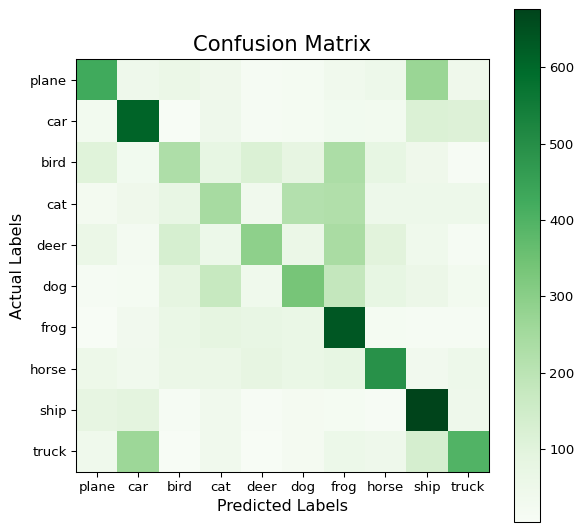

In [142]:
plt.figure(figsize=(7,7), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, label_names)
plt.xticks(tick_marks, label_names)

plt.colorbar()


    

plt.show()

In [117]:
recall_score = np.diag(conf_matrix)/np.sum(conf_matrix, axis = 1)
recall_score

array([0.426, 0.609, 0.226, 0.243, 0.291, 0.333, 0.636, 0.491, 0.676,
       0.397])

In [119]:
precision = np.diag(conf_matrix)/ np.sum(conf_matrix, axis = 0)
precision

array([0.51079137, 0.51349073, 0.31301939, 0.28487691, 0.42920354,
       0.37373737, 0.36976744, 0.5228967 , 0.47438596, 0.52792553])

In [129]:
mean_precision = np.mean(precision)

In [130]:
mean_recall =np.mean(recall_score) 

In [133]:
f_score = 2*(mean_precision*mean_recall)/ (mean_precision+mean_recall)

In [134]:
f_score

0.4324043856325373